In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import Image

In [48]:
np.random.seed(101)

In [49]:
RANDOM_SAMPLES = 1000000
random_ = np.random.random(size=RANDOM_SAMPLES)
NBINS_ = int(RANDOM_SAMPLES/10000)

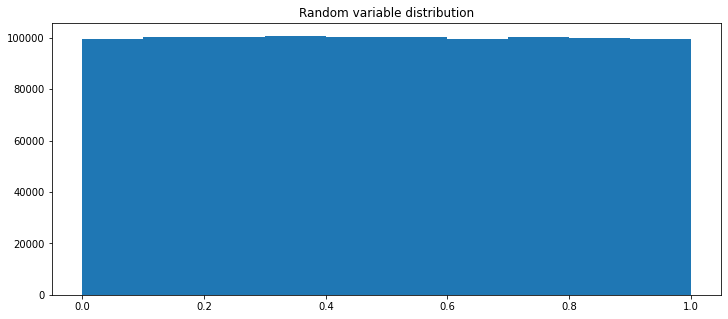

In [50]:
plt.figure(figsize=(12,5))
plt.hist(random_)
plt.title('Random variable distribution')
plt.show()

# Uniform Distribution

probability density function (PDF)

$f(x;a,b) = \frac{1}{b - a}$

$\mu = \frac{a + b}{2}$

$\sigma^2 = \frac{(b - a)^2}{12}$

Now, as a first step generating random numbers under this PDF, we need to know the Cumulative Distribution Funtion (CDF).

$F(X;a,b) = \int_{-\infty}^{x} f(t) dt$

Because the lower boundary in a uniform distribution is a, then:

$F(X;a,b)\int_{a}^{x} \frac{1}{b - a} dt$

Because this distribution is analyzed for $x$ greater than zero, I'll define the integral as:

$F(X;a,b)  = \int_{a}^{x} \frac{1}{b - a} dt$

$F(X;a,b) = \frac{1}{b - a} t\bigg|_{t=a}^{t=x} = \frac{1}{b - a} (x - a)$

$F(X;a,b) = \frac{x - a}{b - a}$

You can generate random numbers following this CDF passing a *uniform random variable* into inverse CDF, like this:

$F(X;a,b) = P(X \leq x) = Q = \frac{x - a}{b - a}$

$Q (b - a) = x - a$

$Q (b - a) + a = x$

$= F^{-1}(Q;a,b) = Q (b - a) + a$

In [5]:
def uniform_generator_numbers(uniform_variable, a, b):
    return uniform_variable * (b-a) + a

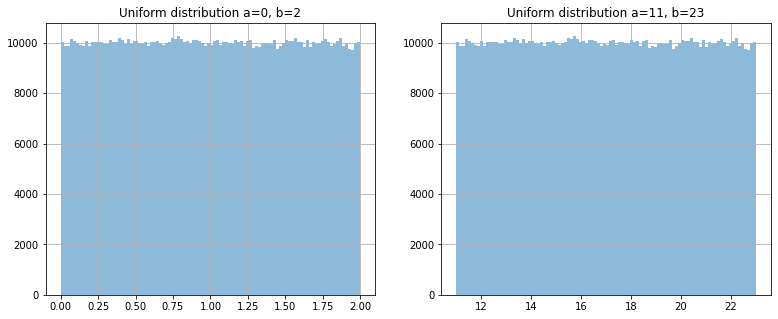

In [6]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.hist(uniform_generator_numbers(random_, 0,2), bins=NBINS_, alpha=0.5)
plt.title('Uniform distribution a=0, b=2')
plt.grid()

plt.subplot(1,2,2)
plt.hist(uniform_generator_numbers(random_, 11,23), bins=NBINS_, alpha=0.5)
plt.title('Uniform distribution a=11, b=23')
plt.grid()

plt.show()

# Exponential Distro

probability density function (PDF)

$f(x;\lambda) = \lambda e^{-\lambda x}$

$\mu = \frac{1}{\lambda}$

$\sigma^2 = \frac{1}{\lambda}$

Now, as a first step generating random numbers under this PDF, we need to know the Cumulative Distribution Funtion (CDF).

$F(X;\lambda) = \int_{-\infty}^{x} \lambda e^{-\lambda t} dt$

Because this distribution is analyzed for $x$ greater than zero, I'll define the integral as:

$F(X;\lambda) = \int_{0}^{x} \lambda e^{-\lambda t} dt$

$F(X;\lambda) = -e^{-\lambda t}\bigg|_{t=0}^{t=x} = -e^{-\lambda x} - (-e^{-\lambda 0}) = -e^{-\lambda x} - (-1)$

$F(X;\lambda) = 1 - e^{-\lambda x}$

You can generate random numbers following this CDF passing a *uniform random variable* into inverse CDF, like this:

$F(X;\lambda) = P(X \leq x) = Q = 1 - e^{-\lambda x}$

$Q - 1 = - e^{-\lambda x}$

$1 - Q = e^{-\lambda x}$

$ln(1 - Q) = ln(e^{-\lambda x})$

$ln(1 - Q) = (-\lambda x)ln(e)$

$ln(1 - Q) = (-\lambda x)$

$\frac{ln(1 - Q)}{-\lambda} = x = F^{-1}(Q;\lambda)$

In [7]:
def exponential_generator_numbers(uniform_variable, lambda_):
    return np.log(1-uniform_variable)/-lambda_

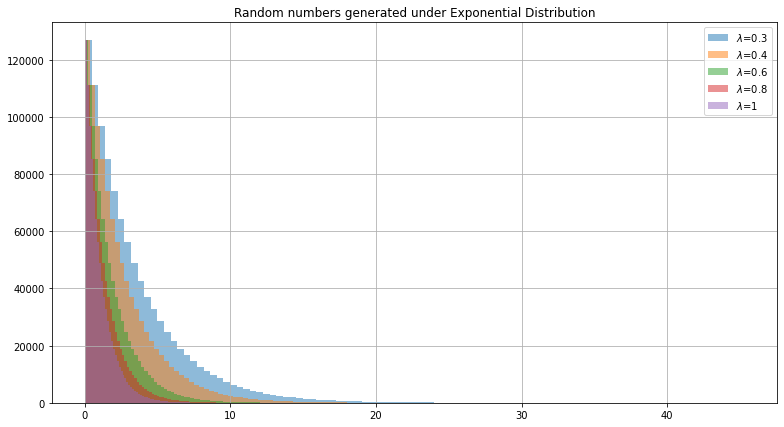

In [8]:
plt.figure(figsize=(13,7))

plt.hist(exponential_generator_numbers(random_, 0.3), bins=NBINS_, alpha=0.5, label='$\lambda$=0.3')
plt.hist(exponential_generator_numbers(random_, 0.4), bins=NBINS_, alpha=0.5, label='$\lambda$=0.4')
plt.hist(exponential_generator_numbers(random_, 0.6), bins=NBINS_, alpha=0.5, label='$\lambda$=0.6')
plt.hist(exponential_generator_numbers(random_, 0.8), bins=NBINS_, alpha=0.5, label='$\lambda$=0.8')
plt.hist(exponential_generator_numbers(random_, 1), bins=NBINS_, alpha=0.5, label='$\lambda$=1')
plt.title('Random numbers generated under Exponential Distribution')
plt.legend()
plt.grid()
plt.show()

# Normal Distribution


probability density function (PDF)

$f(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

Because there isn't any closed form to describe the inverse CDF I'll use the function implemented by scipy package, although it follows the same idea, I mean, passing an uniform random variable (a=0, b=1) trough inverse CDF.

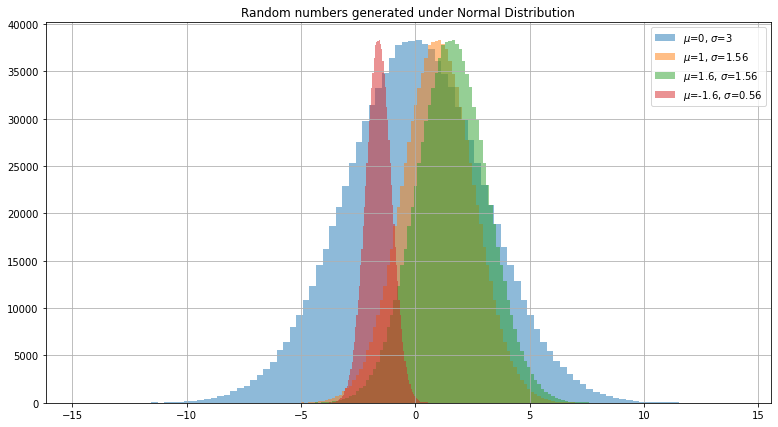

In [9]:
plt.figure(figsize=(13,7))

plt.hist(norm.ppf(random_,loc=0, scale=3), bins=NBINS_, alpha=0.5, label='$\mu$=0, $\sigma$=3')
plt.hist(norm.ppf(random_,loc=1, scale=1.56), bins=NBINS_, alpha=0.5, label='$\mu$=1, $\sigma$=1.56')
plt.hist(norm.ppf(random_,loc=1.6, scale=1.56), bins=NBINS_, alpha=0.5, label='$\mu$=1.6, $\sigma$=1.56')
plt.hist(norm.ppf(random_,loc=-1.6, scale=0.56), bins=NBINS_, alpha=0.5, label='$\mu$=-1.6, $\sigma$=0.56')

plt.title('Random numbers generated under Normal Distribution')
plt.legend()
plt.grid()
plt.show()

# Triangular Distribution

The triangular distribution has a particular behavior, mainly because it's shaped piecewise. Its PDF is defined by:

$f(x) = \begin{cases}
    0 &\quad x < a\\
    \frac{2(x-a)}{(b-a)(m-a)} &\quad a \leq x < m\\
    \frac{2}{b-a} &\quad x = c\\
    \frac{2(b-x)}{(b-a)(b-m)} &\quad m < x \leq b\\
    0 &\quad x > b
\end{cases}$

So, because this CDF is piecewise, I'll work with piecewise functions. Additionally this PDF must be analyzed geometrically **-how is described by <a href="https://www.amazon.com/-/es/Samuel-Kotz/dp/9812561153" target="_blank">Samuel Kotz</a>, pg. 6-**, like this:

The Distribution may be represented as
<img src="assets/TriangleDistro.png"/>

Geometrically we can get the high of the triangle, named H considering this is a probability distribution then $A_1$ and $A_2$ are added the result must be 1.

$A_1 + A_2 = 1$

Then it is possible to calculate the area of each one:

$A_1 = \frac{(m-a)H}{2}$

$A_2 = \frac{(b-m)H}{2}$

$A_1 + A_2 = \frac{(m-a)H}{2} + \frac{(b-m)H}{2} = 1$

$\frac{(m-a)H + (b-m)H}{2} \implies (m-a)H + (b-m)H = 2 \implies H((m-a) + (b-m)) = 2 \implies H(b-a) = 2$

$H=\frac{2}{b-a}$

* $a \leq z < m$

<img src="assets/TriangleDistro_subA1.PNG"/>

Assuming we want to calculate the CDF for $z$, we can infer the formula infering $h_1$ previously, in this way:

$F_1(x;a,b,m) = A_1 = \frac{(m-a)H}{2} = \frac{(m-a)}{2}\frac{2}{b-a} = \frac{m-a}{b-a} = \frac{(z-a)h_1}{2} + \frac{(m-z)(H-h_1)}{2} + (m-z)h_1$


$\frac{m-a}{b-a} = \frac{(z-a)h_1}{2} + \frac{(m-z)H}{2} - \frac{(m-z)h_1}{2} + (m-z)h_1$

$\frac{m-a}{b-a} = \frac{(z-a)h_1}{2} + \frac{(m-z)H}{2} + \frac{(m-z)h_1}{2} = \frac{(z-a)h_1 + (m-z)H + (m-z)h_1}{2}$

$\frac{2(m-a)}{b-a} = (z-a)h_1 + (m-z)H + (m-z)h_1 = (m-a)h_1 + (m-z)\frac{2}{b-a}$

$\frac{2(m-a)}{b-a} - \frac{2(m-z)}{b-a} = (m-a)h_1 = \frac{2}{b-a}((m-a) - (m-z)) = (m-a)h_1 = \frac{2}{b-a}(m-a-m+z))$

$(m-a)h_1 = \frac{2}{b-a}(z-a) \implies h_1 = \frac{2(z-a)}{(b-a)(m-a)}$

Now, having found $h_1$ expression we can formulate the value of area until $z$

$A_z = \frac{(z-a)h_1}{2} = \frac{(z-a)}{2}\frac{2(z-a)}{(b-a)(m-a)} = \frac{(z-a)^2}{(b-a)(m-a)} = F_1(z;a,b,m)$

Finally if $z = m$ then $A_z = \frac{(m-a)^2}{(b-a)(m-a)} = \frac{(m-a)}{(b-a)}$

* $m \leq z < b$

<img src="assets/TriangleDistro_subA2.PNG"/>

As it was done above, calculating $h2$ is important now considering $z$ is some value in the right piece of the triangle. **It is important the next calculations will be just to identify the $h_2$ expression**

$A_2 = \frac{(b-m)H}{2} = \frac{(b-m)}{2} \frac{2}{b-a} = \frac{b-m}{b-a} = (z-m)h_2 + \frac{(z-m)(H-h_2)}{2} + \frac{(b-z)h_2}{2}$


$\frac{b-m}{b-a} = (z-m)h_2 + \frac{H(z-m)}{2} - \frac{h_2(z-m)}{2} + \frac{(b-z)h_2}{2}$

$\frac{b-m}{b-a} = \frac{H(z-m)}{2} + \frac{h_2(z-m)}{2} + \frac{(b-z)h_2}{2}$

$\frac{2(b-m)}{b-a} = h_2(b-m) + H(z-m) = h_2(b-m) + \frac{2}{b-a}(z-m)$

$\frac{2(b-m)}{b-a} - \frac{2(z-m)}{b-a} = h_2(b-m)$

$\frac{2}{b-a}((b-m)-(z-m)) = h_2(b-m) \implies \frac{2}{b-a}(b-m-z+m) = h_2(b-m)$

$h_2 = \frac{2}{b-a}(b-z) \implies h_2 = \frac{2(b-z)}{(b-a)(b-m)}$

Having found $h_2$ it is possible to calculate the area of $z$ just within $A_2$. **This is not the complete area until $z$ from a**. The method I'll use is complement -$A_z^c$- of $A_z$ in $A_2$, like this:

$A_2 = A_z + A_z^c$

Becuase of that ..

$A_z = A_2 - A_z^c$

$A_z = \frac{b-m}{b-a} - \frac{(b-z)h_2}{2} = \frac{b-m}{b-a} - \frac{(b-z)}{2}\frac{2(b-z)}{(b-a)(b-m)} = \frac{b-m}{b-a} - \frac{(b-z)^2}{(b-a)(b-m)}$

For completing the area until $z$ taking into account the area under $A_1$ it's only necessary adding $A_z$ calculate previously in $A_1$ when $z=m$ ...

$A_z^Total = \frac{m-a}{b-a} + \frac{b-m}{b-a} - \frac{(b-z)^2}{(b-a)(b-m)}$

$A_z^{Total} = \frac{(m-a)+(b-m)}{b-a} - \frac{(b-z)^2}{(b-a)(b-m)} = \frac{(m-a+b-m)}{b-a} - \frac{(b-z)^2}{(b-a)(b-m)}$
$A_z^{Total} = \frac{b-a}{b-a} - \frac{(b-z)^2}{(b-a)(b-m)} = 1 - \frac{(b-z)^2}{(b-a)(b-m)} = F_2(z;a,b,m)$

Having the results got above, we can define CDF also piecewise.

$F(x) = \begin{cases}
    \frac{(z-a)^2}{(b-a)(m-a)} &\quad a \leq z < m\\
    1 - \frac{(b-z)^2}{(b-a)(b-m)} &\quad m < z \leq b\\
\end{cases}$

Now, because we need the inverse cumulative function to be able to generate random numbers under this distribution, we need to calculate it.

$F_1(z;a,b,m) = Q_1 = \frac{(z-a)^2}{(b-a)(m-a)}$

$Q_1(b-a)(m-a) = (z-a)^2$

$\sqrt{Q_1(b-a)(m-a)} + a = z = F_1^{-1}(Q_1;a,b,m)$


<hr>

$F_2(z;a,b,m) = Q_2 = 1 - \frac{(b-z)^2}{(b-a)(b-m)}$

$Q_2 - 1 = - \frac{(b-z)^2}{(b-a)(b-m)}$

$1 - Q_2 = \frac{(b-z)^2}{(b-a)(b-m)}$

$(1-Q_2)(b-a)(b-m) = (b-z)^2$

$\sqrt{(1-Q_2)(b-a)(b-m)} = b-z$

$z = b-\sqrt{(1-Q_2)(b-a)(b-m)} = F_2^{-1}(Q_2;a,b,m)$

<hr>

$F^{-1}(Q) = \begin{cases}
    \sqrt{Q_1(b-a)(m-a)} + a &\quad Q_1 < Q_m\\
    b-\sqrt{(1-Q_2)(b-a)(b-m)} &\quad Q_2 > Q_m\\
\end{cases}$

Recalling $Q_m = A_1$ because that's the case when $z=m$

In [61]:
def triangle_generator_numbers(uniform_variable, a,b,m):
    result = np.zeros(uniform_variable.shape[0])
    q_m = (m-a)/(b-a)
    mask_lower = uniform_variable < q_m
    result = np.where(mask_lower, np.sqrt(uniform_variable*(b-a)*(m-a))+a, uniform_variable)
    result = np.where(~mask_lower, b-np.sqrt((1-uniform_variable)*(b-a)*(b-m)), result)
    return result

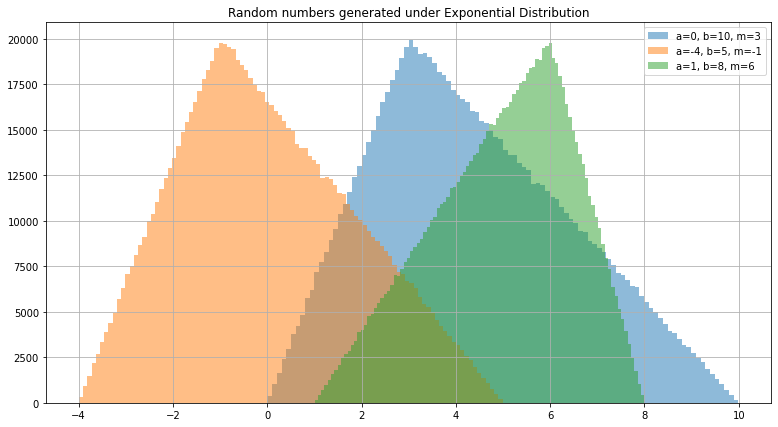

In [70]:
plt.figure(figsize=(13,7))

plt.hist(triangle_generator_numbers(random_, 0,10,3), bins=NBINS_, alpha=0.5, label='a=0, b=10, m=3')
plt.hist(triangle_generator_numbers(random_, -4,5,-1), bins=NBINS_, alpha=0.5, label='a=-4, b=5, m=-1')
plt.hist(triangle_generator_numbers(random_, 1,8,6), bins=NBINS_, alpha=0.5, label='a=1, b=8, m=6')
plt.title('Random numbers generated under Exponential Distribution')
plt.legend()
plt.grid()
plt.show()